<a href="https://colab.research.google.com/github/GustavoHDLC1/Colab_Files_PADP/blob/main/Sem8_Practica18.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[Enlace GitHub](https://github.com/GustavoHDLC1/Colab_Files_PADP/blob/main/Sem8_Practica18.ipynb)

In [1]:
import pandas as pd
import numpy as np
import math
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

In [2]:
df = pd.read_csv('/content/drive/MyDrive/MIAAD/PADP/AirQuality.csv',sep=';')
df

Date      Time CO(GT)  PT08.S1(CO)  NMHC(GT) C6H6(GT)  \
0     10/03/2004  18.00.00    2,6       1360.0     150.0     11,9   
1     10/03/2004  19.00.00      2       1292.0     112.0      9,4   
2     10/03/2004  20.00.00    2,2       1402.0      88.0      9,0   
3     10/03/2004  21.00.00    2,2       1376.0      80.0      9,2   
4     10/03/2004  22.00.00    1,6       1272.0      51.0      6,5   
...          ...       ...    ...          ...       ...      ...   
9466         NaN       NaN    NaN          NaN       NaN      NaN   
9467         NaN       NaN    NaN          NaN       NaN      NaN   
9468         NaN       NaN    NaN          NaN       NaN      NaN   
9469         NaN       NaN    NaN          NaN       NaN      NaN   
9470         NaN       NaN    NaN          NaN       NaN      NaN   

      PT08.S2(NMHC)  NOx(GT)  PT08.S3(NOx)  NO2(GT)  PT08.S4(NO2)  \
0            1046.0    166.0        1056.0    113.0        1692.0   
1             955.0    103.0        1174.0     92.0        1559.0   
2             939.0    131.0        1140.0    114.0        1555.0   
3             948.0    172.0        1092.0    122.0        1584.0   
4             836.0    131.0        1205.0    116.0        1490.0   
...             ...      ...           ...      ...           ...   
9466            NaN      NaN           NaN      NaN           NaN   
9467            NaN      NaN           NaN      NaN           NaN   
9468            NaN      NaN           NaN      NaN           NaN   
9469            NaN      NaN           NaN      NaN           NaN   
9470            NaN      NaN           NaN      NaN           NaN   

      PT08.S5(O3)     T    RH      AH  Unnamed: 15  Unnamed: 16  
0          1268.0  13,6  48,9  0,7578          NaN          NaN  
1           972.0  13,3  47,7  0,7255          NaN          NaN  
2          1074.0  11,9  54,0  0,7502          NaN          NaN  
3          1203.0  11,0  60,0  0,7867          NaN          NaN  
4          1110.0  11,2  59,6  0,7888          NaN          NaN  
...           ...   ...   ...     ...          ...          ...  
9466          NaN   NaN   NaN     NaN          NaN          NaN  
9467          NaN   NaN   NaN     NaN          NaN          NaN  
9468          NaN   NaN   NaN     NaN          NaN          NaN  
9469          NaN   NaN   NaN     NaN          NaN          NaN  
9470          NaN   NaN   NaN     NaN          NaN          NaN  

[9471 rows x 17 columns]

Con lo anterior tenemos una vista general del df y observamos que cuenta con 9,471 filas y 17 columnas

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9471 entries, 0 to 9470
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           9357 non-null   object 
 1   Time           9357 non-null   object 
 2   CO(GT)         9357 non-null   object 
 3   PT08.S1(CO)    9357 non-null   float64
 4   NMHC(GT)       9357 non-null   float64
 5   C6H6(GT)       9357 non-null   object 
 6   PT08.S2(NMHC)  9357 non-null   float64
 7   NOx(GT)        9357 non-null   float64
 8   PT08.S3(NOx)   9357 non-null   float64
 9   NO2(GT)        9357 non-null   float64
 10  PT08.S4(NO2)   9357 non-null   float64
 11  PT08.S5(O3)    9357 non-null   float64
 12  T              9357 non-null   object 
 13  RH             9357 non-null   object 
 14  AH             9357 non-null   object 
 15  Unnamed: 15    0 non-null      float64
 16  Unnamed: 16    0 non-null      float64
dtypes: float64(10), object(7)
memory usage: 1.2+ MB


Nos apoyamos del método info de los df para observar el tipo de dato asignado a cada variable así como detectar valores no nulos por cada una, de este paso destacan varios puntos, tales como que las últimas dos columnas solo tienen valores nulos, todas las variables tienen registros vacíos y en algunas variables el tipo de dato no es el correcto.

In [4]:
df.drop(['Unnamed: 15', 'Unnamed: 16'], axis=1, inplace = True)
df['Date'] = pd.to_datetime(df['Date'], format='%d/%m/%Y')
df['Time'] = pd.to_datetime(df['Time'], format='%H.%M.%S').dt.time
df['CO(GT)'] = df['CO(GT)'].str.replace(',','.').astype(float)
df['C6H6(GT)'] = df['C6H6(GT)'].str.replace(',','.').astype(float)
df['T'] = df['T'].str.replace(',','.').astype(float)
df['RH'] = df['RH'].str.replace(',','.').astype(float)
df['AH'] = df['AH'].str.replace(',','.').astype(float)
df['DayOfWeek'] = (df['Date'].dt.day_name()).astype('category')

El código anterior eliminó columnas con todos sus valores nulos, ya que no aportan ningún valor, después ajustamos el tipo de dato de las variables de tipo fecha y tiempo, al final corregimos los valores de las columnas numéricas y cambiamos al tipo de dato correspondiente

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9471 entries, 0 to 9470
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Date           9357 non-null   datetime64[ns]
 1   Time           9357 non-null   object        
 2   CO(GT)         9357 non-null   float64       
 3   PT08.S1(CO)    9357 non-null   float64       
 4   NMHC(GT)       9357 non-null   float64       
 5   C6H6(GT)       9357 non-null   float64       
 6   PT08.S2(NMHC)  9357 non-null   float64       
 7   NOx(GT)        9357 non-null   float64       
 8   PT08.S3(NOx)   9357 non-null   float64       
 9   NO2(GT)        9357 non-null   float64       
 10  PT08.S4(NO2)   9357 non-null   float64       
 11  PT08.S5(O3)    9357 non-null   float64       
 12  T              9357 non-null   float64       
 13  RH             9357 non-null   float64       
 14  AH             9357 non-null   float64       
 15  DayOfWeek      9357 n

In [6]:
df_num = df.select_dtypes(include=["number"])
df_num.describe()

CO(GT)  PT08.S1(CO)     NMHC(GT)     C6H6(GT)  PT08.S2(NMHC)  \
count  9357.000000  9357.000000  9357.000000  9357.000000    9357.000000   
mean    -34.207524  1048.990061  -159.090093     1.865683     894.595276   
std      77.657170   329.832710   139.789093    41.380206     342.333252   
min    -200.000000  -200.000000  -200.000000  -200.000000    -200.000000   
25%       0.600000   921.000000  -200.000000     4.000000     711.000000   
50%       1.500000  1053.000000  -200.000000     7.900000     895.000000   
75%       2.600000  1221.000000  -200.000000    13.600000    1105.000000   
max      11.900000  2040.000000  1189.000000    63.700000    2214.000000   

           NOx(GT)  PT08.S3(NOx)      NO2(GT)  PT08.S4(NO2)  PT08.S5(O3)  \
count  9357.000000   9357.000000  9357.000000   9357.000000  9357.000000   
mean    168.616971    794.990168    58.148873   1391.479641   975.072032   
std     257.433866    321.993552   126.940455    467.210125   456.938184   
min    -200.000000   -200.000000  -200.000000   -200.000000  -200.000000   
25%      50.000000    637.000000    53.000000   1185.000000   700.000000   
50%     141.000000    794.000000    96.000000   1446.000000   942.000000   
75%     284.000000    960.000000   133.000000   1662.000000  1255.000000   
max    1479.000000   2683.000000   340.000000   2775.000000  2523.000000   

                 T           RH           AH  
count  9357.000000  9357.000000  9357.000000  
mean      9.778305    39.485380    -6.837604  
std      43.203623    51.216145    38.976670  
min    -200.000000  -200.000000  -200.000000  
25%      10.900000    34.100000     0.692300  
50%      17.200000    48.600000     0.976800  
75%      24.100000    61.900000     1.296200  
max      44.600000    88.700000     2.231000

In [7]:
columns = df_num.columns
n = len(columns)
rows = math.ceil(n / 3)  # 3 columnas por fila
# Crear los gráficos de PDF e Histograma
plt.figure(figsize=(12, 4*rows))
for i, col in enumerate(columns, 1):
    plt.subplot(rows, 3, i)  # Ajustar la cantidad de subgráficos según el número de columnas
    sns.histplot(df_num[col], kde=True, bins=30, color='blue')
    plt.title(f'PDF y Histograma de {col}', fontsize=12)
    plt.xlabel(col, fontsize=10)
    plt.ylabel('Frecuencia', fontsize=10)

plt.tight_layout()
plt.show()

In [8]:
group_days = df['DayOfWeek'].value_counts().reset_index()
group_days

DayOfWeek  count
0     Friday   1344
1   Saturday   1344
2     Sunday   1344
3   Thursday   1344
4     Monday   1335
5  Wednesday   1326
6    Tuesday   1320

In [9]:
sns.barplot(x="DayOfWeek", y="count", data=group_days, hue="DayOfWeek", palette="Set2",
            order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.title("Suma de valores por categoría")
plt.show()

In [10]:
# Configurar el tamaño de la figura
plt.figure(figsize=(15, 10))
rows = math.ceil(n / 4)  # 4 columnas por fila
# Crear boxplots para cada columna numérica
for i, col in enumerate(columns, 1):
    plt.subplot(rows, 4, i)  # n filas, 3 columnas de subplots
    sns.boxplot(x=df_num[col])
    plt.title(f'Boxplot de {col}')
plt.tight_layout()
plt.show()

In [11]:
# Calcular la matriz de correlación
corr_matrix = df_num.corr()

# Mostrar la matriz de correlación
print("Matriz de correlación:")
corr_matrix


Matriz de correlación:


CO(GT)  PT08.S1(CO)  NMHC(GT)  C6H6(GT)  PT08.S2(NMHC)  \
CO(GT)         1.000000     0.041411  0.128351 -0.031378       0.029926   
PT08.S1(CO)    0.041411     1.000000  0.170007  0.852687       0.933102   
NMHC(GT)       0.128351     0.170007  1.000000  0.037323       0.110104   
C6H6(GT)      -0.031378     0.852687  0.037323  1.000000       0.767433   
PT08.S2(NMHC)  0.029926     0.933102  0.110104  0.767433       1.000000   
NOx(GT)        0.526451     0.277993 -0.004427 -0.001174       0.331272   
PT08.S3(NOx)  -0.089981     0.087019  0.048821  0.512193      -0.073667   
NO2(GT)        0.671127     0.154030  0.103307 -0.010992       0.176488   
PT08.S4(NO2)  -0.073724     0.845149  0.162680  0.774673       0.874782   
PT08.S5(O3)    0.080310     0.892434  0.101185  0.641334       0.909905   
T             -0.068939     0.754844 -0.000009  0.971375       0.669025   
RH            -0.048227     0.745375  0.008284  0.925062       0.585803   
AH            -0.045892     0.764903  0.012500  0.984555       0.646572   

                NOx(GT)  PT08.S3(NOx)   NO2(GT)  PT08.S4(NO2)  PT08.S5(O3)  \
CO(GT)         0.526451     -0.089981  0.671127     -0.073724     0.080310   
PT08.S1(CO)    0.277993      0.087019  0.154030      0.845149     0.892434   
NMHC(GT)      -0.004427      0.048821  0.103307      0.162680     0.101185   
C6H6(GT)      -0.001174      0.512193 -0.010992      0.774673     0.641334   
PT08.S2(NMHC)  0.331272     -0.073667  0.176488      0.874782     0.909905   
NOx(GT)        1.000000     -0.436084  0.817139      0.035546     0.461889   
PT08.S3(NOx)  -0.436084      1.000000 -0.256232      0.122734    -0.208865   
NO2(GT)        0.817139     -0.256232  1.000000     -0.022174     0.253439   
PT08.S4(NO2)   0.035546      0.122734 -0.022174      1.000000     0.723690   
PT08.S5(O3)    0.461889     -0.208865  0.253439      0.723690     1.000000   
T             -0.138452      0.588111 -0.084104      0.755060     0.503700   
RH            -0.053009      0.573549 -0.081305      0.640707     0.524955   
AH            -0.095847      0.621618 -0.060440      0.691913     0.519467   

                      T        RH        AH  
CO(GT)        -0.068939 -0.048227 -0.045892  
PT08.S1(CO)    0.754844  0.745375  0.764903  
NMHC(GT)      -0.000009  0.008284  0.012500  
C6H6(GT)       0.971375  0.925062  0.984555  
PT08.S2(NMHC)  0.669025  0.585803  0.646572  
NOx(GT)       -0.138452 -0.053009 -0.095847  
PT08.S3(NOx)   0.588111  0.573549  0.621618  
NO2(GT)       -0.084104 -0.081305 -0.060440  
PT08.S4(NO2)   0.755060  0.640707  0.691913  
PT08.S5(O3)    0.503700  0.524955  0.519467  
T              1.000000  0.885911  0.981001  
RH             0.885911  1.000000  0.943995  
AH             0.981001  0.943995  1.000000

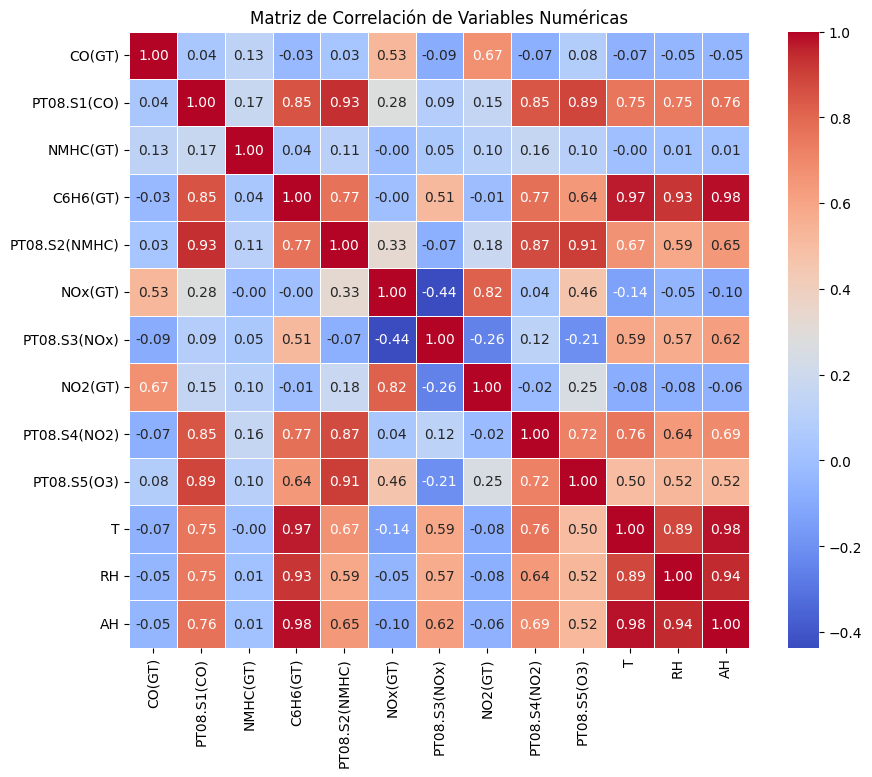

In [12]:
# Visualizar la matriz de correlación con un heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Matriz de Correlación de Variables Numéricas')
plt.show()

In [13]:
# Crear un scatterplot para todas las combinaciones de variables numéricas
sns.pairplot(df_num, plot_kws={'alpha': 0.3}, diag_kind='kde')

# Mostrar el gráfico
plt.show()


In [14]:
# Función para realizar pruebas de normalidad
def normality_tests(data, column_name):
    print(f"\nPruebas de normalidad para la columna: {column_name}")

    # Prueba de Shapiro-Wilk
    shapiro_test = stats.shapiro(data.sample(min(5000, len(data)), random_state=42))  # Muestra de 5000 para evitar problemas de cómputo
    print(f"Shapiro-Wilk Test: p-valor = {shapiro_test.pvalue:.5f}")

    # Prueba de Kolmogorov-Smirnov
    ks_test = stats.kstest(data, 'norm', args=(data.mean(), data.std()))
    print(f"Kolmogorov-Smirnov Test: p-valor = {ks_test.pvalue:.5f}")

    # Prueba de Anderson-Darling
    anderson_test = stats.anderson(data, dist='norm')
    print(f"Anderson-Darling Test: Estadístico = {anderson_test.statistic:.5f}")
    for i in range(len(anderson_test.critical_values)):
        sl, cv = anderson_test.significance_level[i], anderson_test.critical_values[i]
        if anderson_test.statistic < cv:
            print(f"  Al nivel de significancia {sl}%, los datos parecen normales.")
        else:
            print(f"  Al nivel de significancia {sl}%, los datos NO parecen normales.")

    # Prueba de D'Agostino-Pearson
    dagostino_test = stats.normaltest(data)
    print(f"D'Agostino-Pearson Test: p-valor = {dagostino_test.pvalue:.5f}")

# Función para graficar histograma y QQ-Plot
def plot_distribution(data, column_name):
    plt.figure(figsize=(12, 5))

    # Histograma
    plt.subplot(1, 2, 1)
    sns.histplot(data, bins=50, kde=True, color="skyblue")
    plt.title(f"Distribución de {column_name}")

    # QQ-Plot
    plt.subplot(1, 2, 2)
    stats.probplot(data, dist="norm", plot=plt)
    plt.title(f"QQ-Plot de {column_name}")

    plt.show()


Pruebas de normalidad para la columna: CO(GT)
Shapiro-Wilk Test: p-valor = nan
Kolmogorov-Smirnov Test: p-valor = nan
Anderson-Darling Test: Estadístico = nan
  Al nivel de significancia 15.0%, los datos NO parecen normales.
  Al nivel de significancia 10.0%, los datos NO parecen normales.
  Al nivel de significancia 5.0%, los datos NO parecen normales.
  Al nivel de significancia 2.5%, los datos NO parecen normales.
  Al nivel de significancia 1.0%, los datos NO parecen normales.
D'Agostino-Pearson Test: p-valor = nan


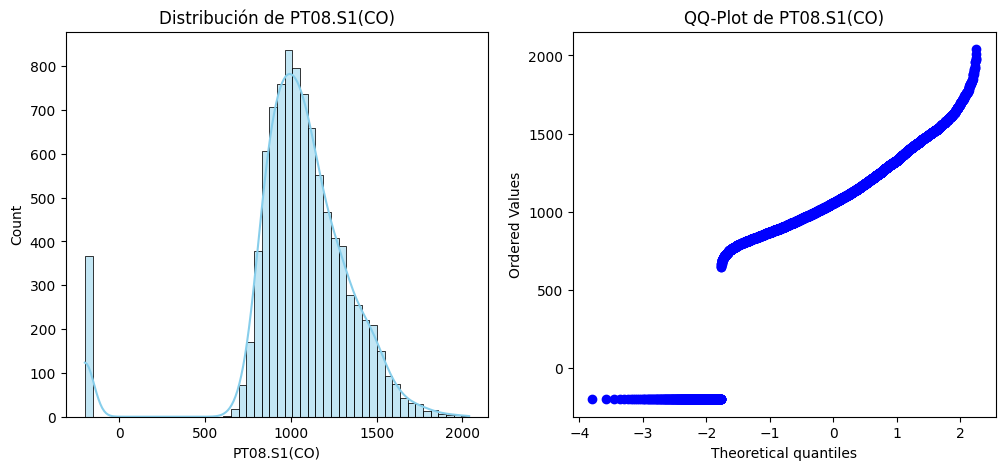


Pruebas de normalidad para la columna: PT08.S1(CO)
Shapiro-Wilk Test: p-valor = nan
Kolmogorov-Smirnov Test: p-valor = nan
Anderson-Darling Test: Estadístico = nan
  Al nivel de significancia 15.0%, los datos NO parecen normales.
  Al nivel de significancia 10.0%, los datos NO parecen normales.
  Al nivel de significancia 5.0%, los datos NO parecen normales.
  Al nivel de significancia 2.5%, los datos NO parecen normales.
  Al nivel de significancia 1.0%, los datos NO parecen normales.
D'Agostino-Pearson Test: p-valor = nan


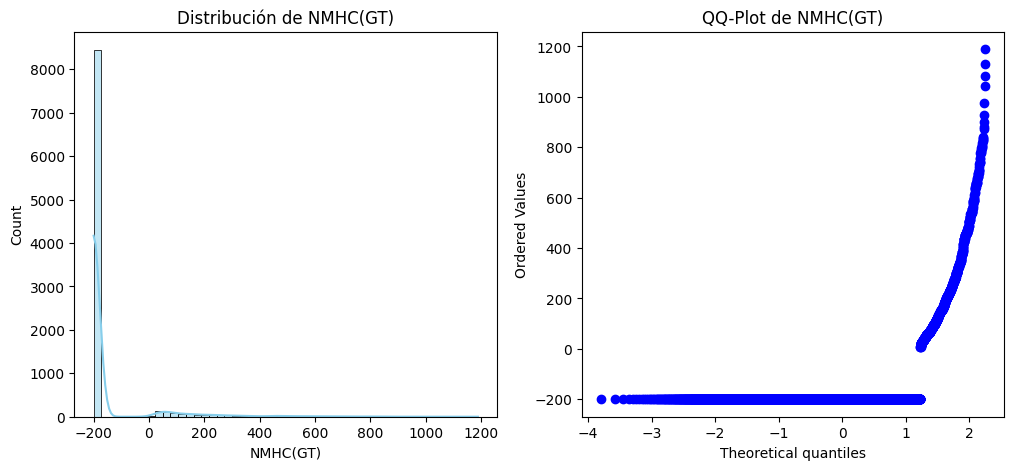


Pruebas de normalidad para la columna: NMHC(GT)
Shapiro-Wilk Test: p-valor = nan
Kolmogorov-Smirnov Test: p-valor = nan
Anderson-Darling Test: Estadístico = nan
  Al nivel de significancia 15.0%, los datos NO parecen normales.
  Al nivel de significancia 10.0%, los datos NO parecen normales.
  Al nivel de significancia 5.0%, los datos NO parecen normales.
  Al nivel de significancia 2.5%, los datos NO parecen normales.
  Al nivel de significancia 1.0%, los datos NO parecen normales.
D'Agostino-Pearson Test: p-valor = nan


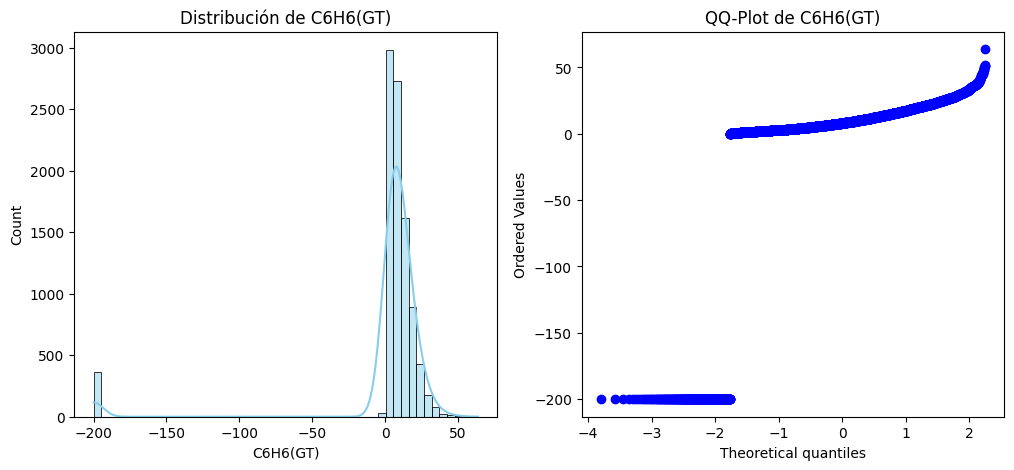


Pruebas de normalidad para la columna: C6H6(GT)
Shapiro-Wilk Test: p-valor = nan
Kolmogorov-Smirnov Test: p-valor = nan
Anderson-Darling Test: Estadístico = nan
  Al nivel de significancia 15.0%, los datos NO parecen normales.
  Al nivel de significancia 10.0%, los datos NO parecen normales.
  Al nivel de significancia 5.0%, los datos NO parecen normales.
  Al nivel de significancia 2.5%, los datos NO parecen normales.
  Al nivel de significancia 1.0%, los datos NO parecen normales.
D'Agostino-Pearson Test: p-valor = nan



Pruebas de normalidad para la columna: PT08.S2(NMHC)
Shapiro-Wilk Test: p-valor = nan
Kolmogorov-Smirnov Test: p-valor = nan
Anderson-Darling Test: Estadístico = nan
  Al nivel de significancia 15.0%, los datos NO parecen normales.
  Al nivel de significancia 10.0%, los datos NO parecen normales.
  Al nivel de significancia 5.0%, los datos NO parecen normales.
  Al nivel de significancia 2.5%, los datos NO parecen normales.
  Al nivel de significancia 1.0%, los datos NO parecen normales.
D'Agostino-Pearson Test: p-valor = nan


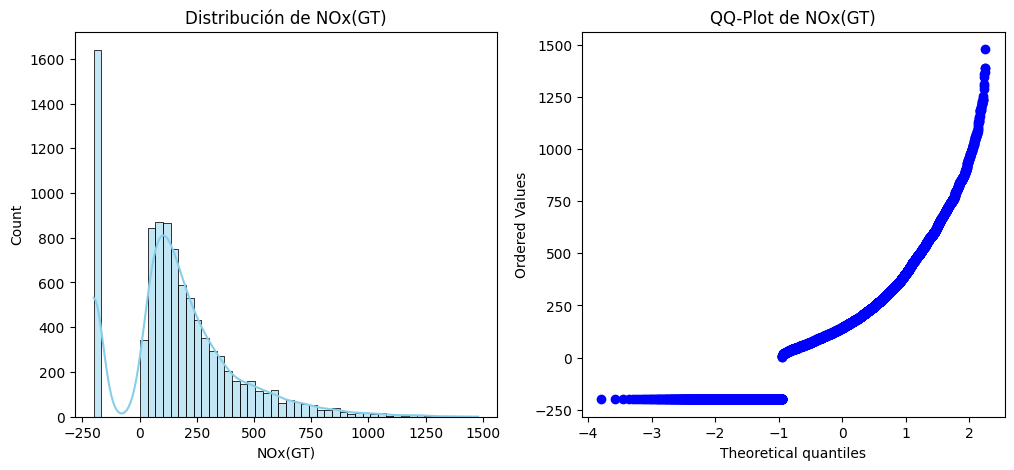


Pruebas de normalidad para la columna: NOx(GT)
Shapiro-Wilk Test: p-valor = nan
Kolmogorov-Smirnov Test: p-valor = nan
Anderson-Darling Test: Estadístico = nan
  Al nivel de significancia 15.0%, los datos NO parecen normales.
  Al nivel de significancia 10.0%, los datos NO parecen normales.
  Al nivel de significancia 5.0%, los datos NO parecen normales.
  Al nivel de significancia 2.5%, los datos NO parecen normales.
  Al nivel de significancia 1.0%, los datos NO parecen normales.
D'Agostino-Pearson Test: p-valor = nan


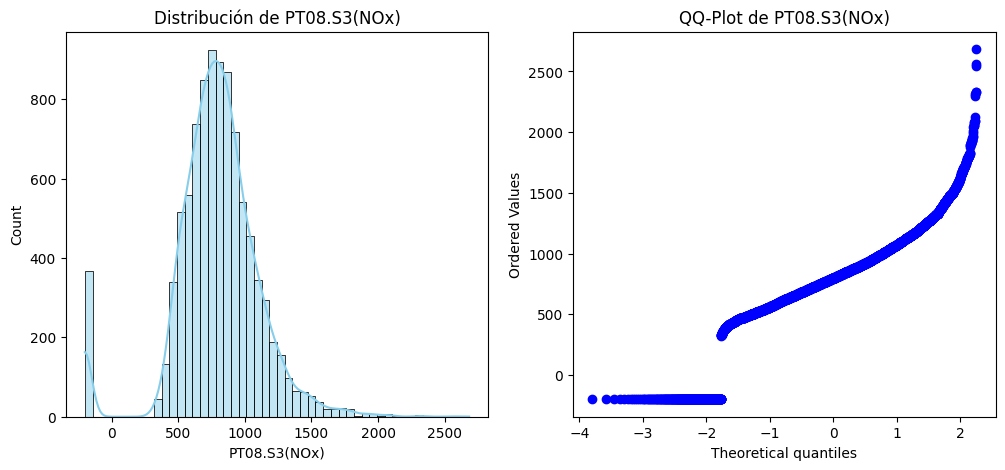


Pruebas de normalidad para la columna: PT08.S3(NOx)
Shapiro-Wilk Test: p-valor = nan
Kolmogorov-Smirnov Test: p-valor = nan
Anderson-Darling Test: Estadístico = nan
  Al nivel de significancia 15.0%, los datos NO parecen normales.
  Al nivel de significancia 10.0%, los datos NO parecen normales.
  Al nivel de significancia 5.0%, los datos NO parecen normales.
  Al nivel de significancia 2.5%, los datos NO parecen normales.
  Al nivel de significancia 1.0%, los datos NO parecen normales.
D'Agostino-Pearson Test: p-valor = nan


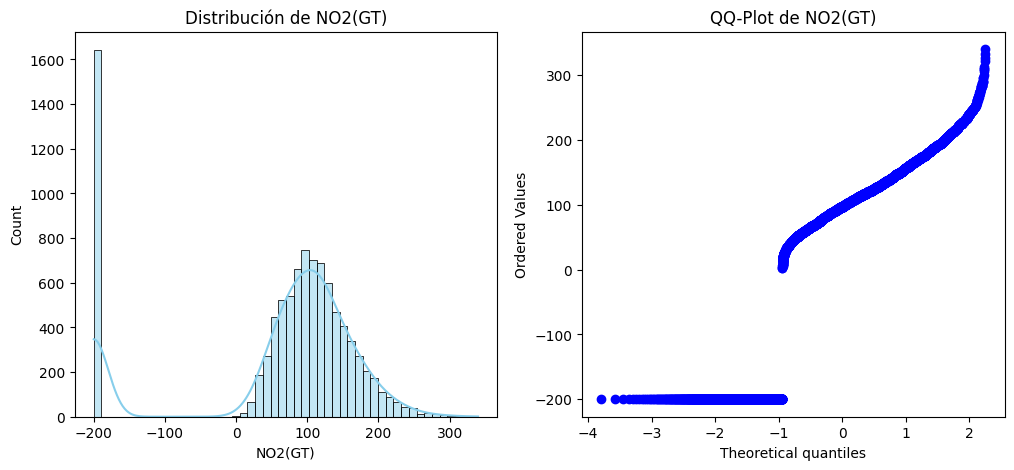


Pruebas de normalidad para la columna: NO2(GT)
Shapiro-Wilk Test: p-valor = nan
Kolmogorov-Smirnov Test: p-valor = nan
Anderson-Darling Test: Estadístico = nan
  Al nivel de significancia 15.0%, los datos NO parecen normales.
  Al nivel de significancia 10.0%, los datos NO parecen normales.
  Al nivel de significancia 5.0%, los datos NO parecen normales.
  Al nivel de significancia 2.5%, los datos NO parecen normales.
  Al nivel de significancia 1.0%, los datos NO parecen normales.
D'Agostino-Pearson Test: p-valor = nan



Pruebas de normalidad para la columna: PT08.S4(NO2)
Shapiro-Wilk Test: p-valor = nan
Kolmogorov-Smirnov Test: p-valor = nan
Anderson-Darling Test: Estadístico = nan
  Al nivel de significancia 15.0%, los datos NO parecen normales.
  Al nivel de significancia 10.0%, los datos NO parecen normales.
  Al nivel de significancia 5.0%, los datos NO parecen normales.
  Al nivel de significancia 2.5%, los datos NO parecen normales.
  Al nivel de significancia 1.0%, los datos NO parecen normales.
D'Agostino-Pearson Test: p-valor = nan


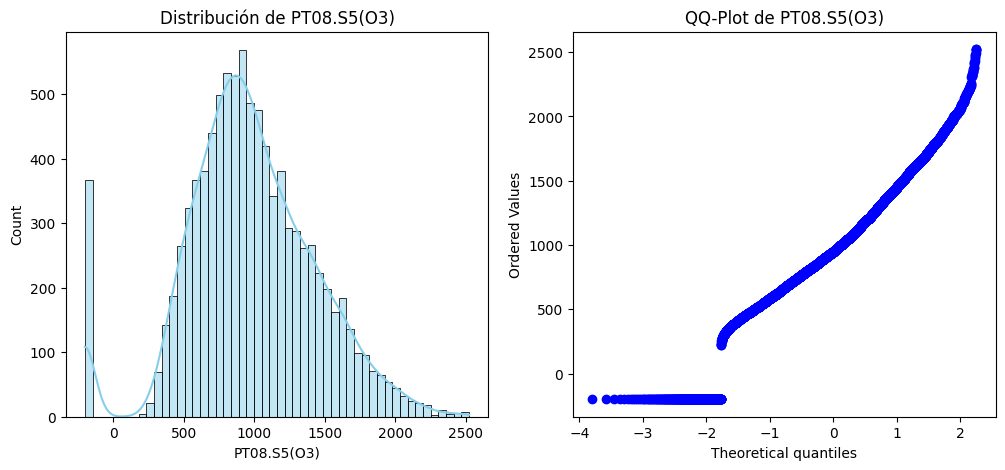


Pruebas de normalidad para la columna: PT08.S5(O3)
Shapiro-Wilk Test: p-valor = nan
Kolmogorov-Smirnov Test: p-valor = nan
Anderson-Darling Test: Estadístico = nan
  Al nivel de significancia 15.0%, los datos NO parecen normales.
  Al nivel de significancia 10.0%, los datos NO parecen normales.
  Al nivel de significancia 5.0%, los datos NO parecen normales.
  Al nivel de significancia 2.5%, los datos NO parecen normales.
  Al nivel de significancia 1.0%, los datos NO parecen normales.
D'Agostino-Pearson Test: p-valor = nan



Pruebas de normalidad para la columna: T
Shapiro-Wilk Test: p-valor = nan
Kolmogorov-Smirnov Test: p-valor = nan
Anderson-Darling Test: Estadístico = nan
  Al nivel de significancia 15.0%, los datos NO parecen normales.
  Al nivel de significancia 10.0%, los datos NO parecen normales.
  Al nivel de significancia 5.0%, los datos NO parecen normales.
  Al nivel de significancia 2.5%, los datos NO parecen normales.
  Al nivel de significancia 1.0%, los datos NO parecen normales.
D'Agostino-Pearson Test: p-valor = nan


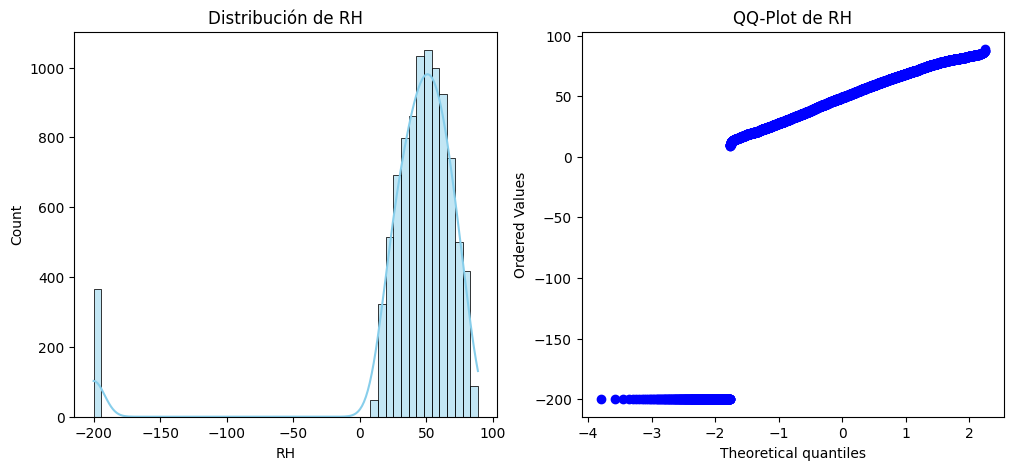


Pruebas de normalidad para la columna: RH
Shapiro-Wilk Test: p-valor = nan
Kolmogorov-Smirnov Test: p-valor = nan
Anderson-Darling Test: Estadístico = nan
  Al nivel de significancia 15.0%, los datos NO parecen normales.
  Al nivel de significancia 10.0%, los datos NO parecen normales.
  Al nivel de significancia 5.0%, los datos NO parecen normales.
  Al nivel de significancia 2.5%, los datos NO parecen normales.
  Al nivel de significancia 1.0%, los datos NO parecen normales.
D'Agostino-Pearson Test: p-valor = nan



Pruebas de normalidad para la columna: AH
Shapiro-Wilk Test: p-valor = nan
Kolmogorov-Smirnov Test: p-valor = nan
Anderson-Darling Test: Estadístico = nan
  Al nivel de significancia 15.0%, los datos NO parecen normales.
  Al nivel de significancia 10.0%, los datos NO parecen normales.
  Al nivel de significancia 5.0%, los datos NO parecen normales.
  Al nivel de significancia 2.5%, los datos NO parecen normales.
  Al nivel de significancia 1.0%, los datos NO parecen normales.
D'Agostino-Pearson Test: p-valor = nan


In [15]:
# Aplicar pruebas de normalidad y gráficos a cada columna numérica
for column in columns:
    data = df_num[column]
    plot_distribution(data, column)
    normality_tests(data, column)


In [16]:
df.dropna(axis=0, how='all', inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9357 entries, 0 to 9356
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Date           9357 non-null   datetime64[ns]
 1   Time           9357 non-null   object        
 2   CO(GT)         9357 non-null   float64       
 3   PT08.S1(CO)    9357 non-null   float64       
 4   NMHC(GT)       9357 non-null   float64       
 5   C6H6(GT)       9357 non-null   float64       
 6   PT08.S2(NMHC)  9357 non-null   float64       
 7   NOx(GT)        9357 non-null   float64       
 8   PT08.S3(NOx)   9357 non-null   float64       
 9   NO2(GT)        9357 non-null   float64       
 10  PT08.S4(NO2)   9357 non-null   float64       
 11  PT08.S5(O3)    9357 non-null   float64       
 12  T              9357 non-null   float64       
 13  RH             9357 non-null   float64       
 14  AH             9357 non-null   float64       
 15  DayOfWeek      9357 non-nu

No se recomienda imputar, ya que se observa que los registros por cada columna que son nulos coinciden con el resto, es decir, todo el registro es nulo, por lo que lo más conveniente es simplemente eliminarlos y no aplicar imputación alguna

In [17]:
df_num.shape

(9471, 13)

In [18]:
df_num.describe()

CO(GT)  PT08.S1(CO)     NMHC(GT)     C6H6(GT)  PT08.S2(NMHC)  \
count  9357.000000  9357.000000  9357.000000  9357.000000    9357.000000   
mean    -34.207524  1048.990061  -159.090093     1.865683     894.595276   
std      77.657170   329.832710   139.789093    41.380206     342.333252   
min    -200.000000  -200.000000  -200.000000  -200.000000    -200.000000   
25%       0.600000   921.000000  -200.000000     4.000000     711.000000   
50%       1.500000  1053.000000  -200.000000     7.900000     895.000000   
75%       2.600000  1221.000000  -200.000000    13.600000    1105.000000   
max      11.900000  2040.000000  1189.000000    63.700000    2214.000000   

           NOx(GT)  PT08.S3(NOx)      NO2(GT)  PT08.S4(NO2)  PT08.S5(O3)  \
count  9357.000000   9357.000000  9357.000000   9357.000000  9357.000000   
mean    168.616971    794.990168    58.148873   1391.479641   975.072032   
std     257.433866    321.993552   126.940455    467.210125   456.938184   
min    -200.000000   -200.000000  -200.000000   -200.000000  -200.000000   
25%      50.000000    637.000000    53.000000   1185.000000   700.000000   
50%     141.000000    794.000000    96.000000   1446.000000   942.000000   
75%     284.000000    960.000000   133.000000   1662.000000  1255.000000   
max    1479.000000   2683.000000   340.000000   2775.000000  2523.000000   

                 T           RH           AH  
count  9357.000000  9357.000000  9357.000000  
mean      9.778305    39.485380    -6.837604  
std      43.203623    51.216145    38.976670  
min    -200.000000  -200.000000  -200.000000  
25%      10.900000    34.100000     0.692300  
50%      17.200000    48.600000     0.976800  
75%      24.100000    61.900000     1.296200  
max      44.600000    88.700000     2.231000

In [19]:
df_num = df.select_dtypes(include=["number"])
df_num.describe()

CO(GT)  PT08.S1(CO)     NMHC(GT)     C6H6(GT)  PT08.S2(NMHC)  \
count  9357.000000  9357.000000  9357.000000  9357.000000    9357.000000   
mean    -34.207524  1048.990061  -159.090093     1.865683     894.595276   
std      77.657170   329.832710   139.789093    41.380206     342.333252   
min    -200.000000  -200.000000  -200.000000  -200.000000    -200.000000   
25%       0.600000   921.000000  -200.000000     4.000000     711.000000   
50%       1.500000  1053.000000  -200.000000     7.900000     895.000000   
75%       2.600000  1221.000000  -200.000000    13.600000    1105.000000   
max      11.900000  2040.000000  1189.000000    63.700000    2214.000000   

           NOx(GT)  PT08.S3(NOx)      NO2(GT)  PT08.S4(NO2)  PT08.S5(O3)  \
count  9357.000000   9357.000000  9357.000000   9357.000000  9357.000000   
mean    168.616971    794.990168    58.148873   1391.479641   975.072032   
std     257.433866    321.993552   126.940455    467.210125   456.938184   
min    -200.000000   -200.000000  -200.000000   -200.000000  -200.000000   
25%      50.000000    637.000000    53.000000   1185.000000   700.000000   
50%     141.000000    794.000000    96.000000   1446.000000   942.000000   
75%     284.000000    960.000000   133.000000   1662.000000  1255.000000   
max    1479.000000   2683.000000   340.000000   2775.000000  2523.000000   

                 T           RH           AH  
count  9357.000000  9357.000000  9357.000000  
mean      9.778305    39.485380    -6.837604  
std      43.203623    51.216145    38.976670  
min    -200.000000  -200.000000  -200.000000  
25%      10.900000    34.100000     0.692300  
50%      17.200000    48.600000     0.976800  
75%      24.100000    61.900000     1.296200  
max      44.600000    88.700000     2.231000

Se observa que dado que los registros eliminados eran nulos en todas sus columnas, no se afectan las estadísticas descriptivas, por lo que replicar el EDA realizado daría los mismos resultados.


Pruebas de normalidad para la columna: CO(GT)
Shapiro-Wilk Test: p-valor = 0.00000
Kolmogorov-Smirnov Test: p-valor = 0.00000
Anderson-Darling Test: Estadístico = 2501.15334
  Al nivel de significancia 15.0%, los datos NO parecen normales.
  Al nivel de significancia 10.0%, los datos NO parecen normales.
  Al nivel de significancia 5.0%, los datos NO parecen normales.
  Al nivel de significancia 2.5%, los datos NO parecen normales.
  Al nivel de significancia 1.0%, los datos NO parecen normales.
D'Agostino-Pearson Test: p-valor = 0.00000



Pruebas de normalidad para la columna: PT08.S1(CO)
Shapiro-Wilk Test: p-valor = 0.00000
Kolmogorov-Smirnov Test: p-valor = 0.00000
Anderson-Darling Test: Estadístico = 355.41246
  Al nivel de significancia 15.0%, los datos NO parecen normales.
  Al nivel de significancia 10.0%, los datos NO parecen normales.
  Al nivel de significancia 5.0%, los datos NO parecen normales.
  Al nivel de significancia 2.5%, los datos NO parecen normales.
  Al nivel de significancia 1.0%, los datos NO parecen normales.
D'Agostino-Pearson Test: p-valor = 0.00000



Pruebas de normalidad para la columna: NMHC(GT)
Shapiro-Wilk Test: p-valor = 0.00000
Kolmogorov-Smirnov Test: p-valor = 0.00000
Anderson-Darling Test: Estadístico = 2820.94917
  Al nivel de significancia 15.0%, los datos NO parecen normales.
  Al nivel de significancia 10.0%, los datos NO parecen normales.
  Al nivel de significancia 5.0%, los datos NO parecen normales.
  Al nivel de significancia 2.5%, los datos NO parecen normales.
  Al nivel de significancia 1.0%, los datos NO parecen normales.
D'Agostino-Pearson Test: p-valor = 0.00000



Pruebas de normalidad para la columna: C6H6(GT)
Shapiro-Wilk Test: p-valor = 0.00000
Kolmogorov-Smirnov Test: p-valor = 0.00000
Anderson-Darling Test: Estadístico = 2272.58484
  Al nivel de significancia 15.0%, los datos NO parecen normales.
  Al nivel de significancia 10.0%, los datos NO parecen normales.
  Al nivel de significancia 5.0%, los datos NO parecen normales.
  Al nivel de significancia 2.5%, los datos NO parecen normales.
  Al nivel de significancia 1.0%, los datos NO parecen normales.
D'Agostino-Pearson Test: p-valor = 0.00000


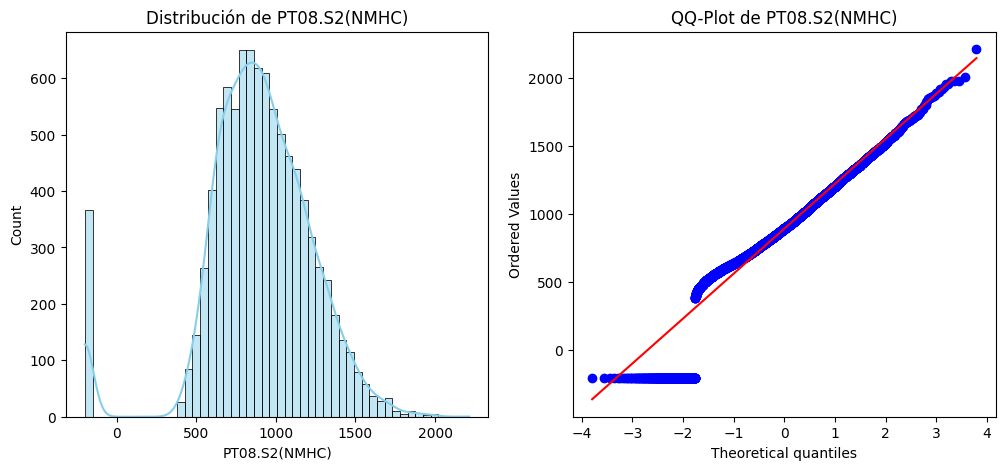


Pruebas de normalidad para la columna: PT08.S2(NMHC)
Shapiro-Wilk Test: p-valor = 0.00000
Kolmogorov-Smirnov Test: p-valor = 0.00000
Anderson-Darling Test: Estadístico = 119.20819
  Al nivel de significancia 15.0%, los datos NO parecen normales.
  Al nivel de significancia 10.0%, los datos NO parecen normales.
  Al nivel de significancia 5.0%, los datos NO parecen normales.
  Al nivel de significancia 2.5%, los datos NO parecen normales.
  Al nivel de significancia 1.0%, los datos NO parecen normales.
D'Agostino-Pearson Test: p-valor = 0.00000


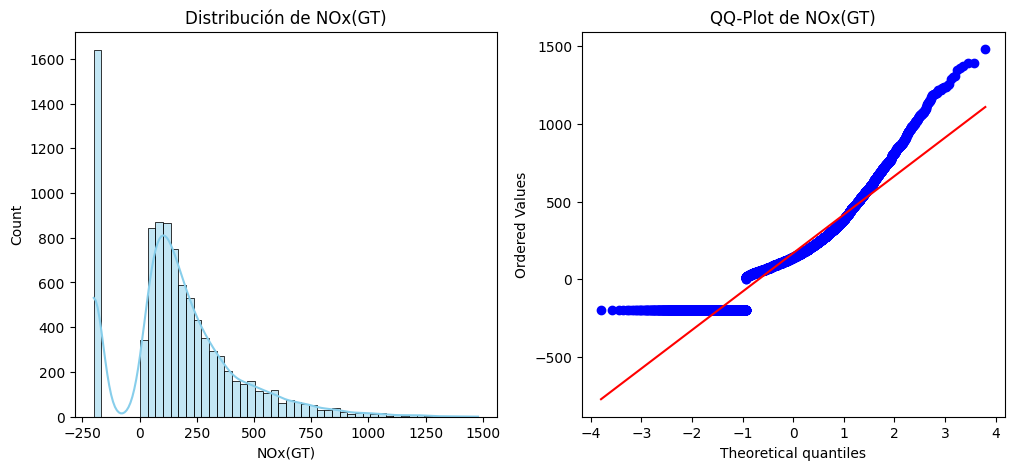


Pruebas de normalidad para la columna: NOx(GT)
Shapiro-Wilk Test: p-valor = 0.00000
Kolmogorov-Smirnov Test: p-valor = 0.00000
Anderson-Darling Test: Estadístico = 188.79429
  Al nivel de significancia 15.0%, los datos NO parecen normales.
  Al nivel de significancia 10.0%, los datos NO parecen normales.
  Al nivel de significancia 5.0%, los datos NO parecen normales.
  Al nivel de significancia 2.5%, los datos NO parecen normales.
  Al nivel de significancia 1.0%, los datos NO parecen normales.
D'Agostino-Pearson Test: p-valor = 0.00000


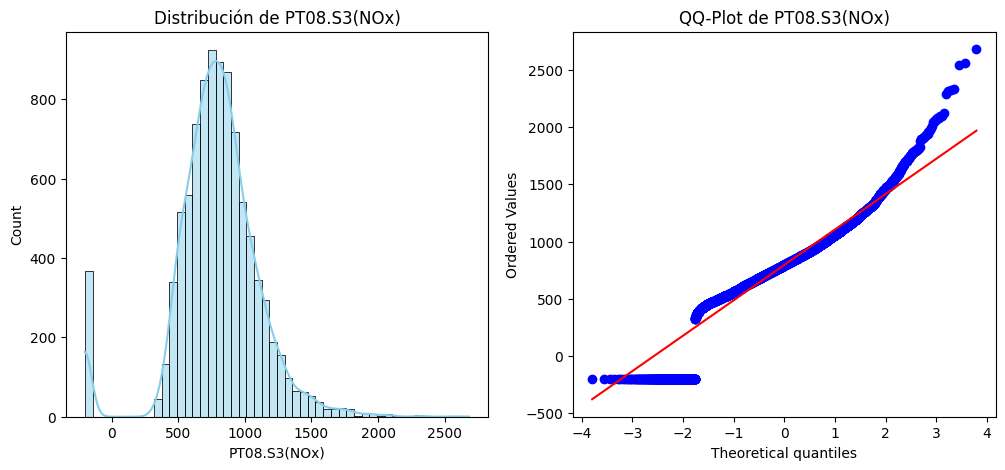


Pruebas de normalidad para la columna: PT08.S3(NOx)
Shapiro-Wilk Test: p-valor = 0.00000
Kolmogorov-Smirnov Test: p-valor = 0.00000
Anderson-Darling Test: Estadístico = 159.03112
  Al nivel de significancia 15.0%, los datos NO parecen normales.
  Al nivel de significancia 10.0%, los datos NO parecen normales.
  Al nivel de significancia 5.0%, los datos NO parecen normales.
  Al nivel de significancia 2.5%, los datos NO parecen normales.
  Al nivel de significancia 1.0%, los datos NO parecen normales.
D'Agostino-Pearson Test: p-valor = 0.00000


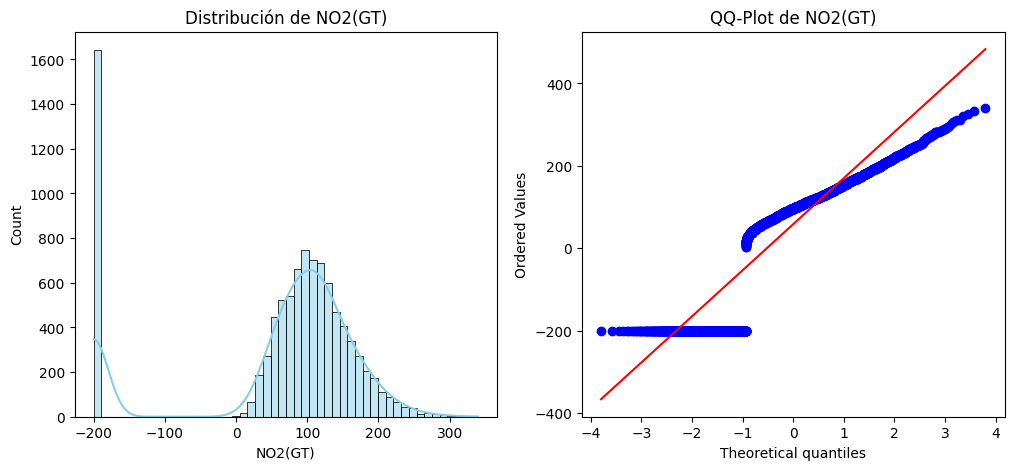


Pruebas de normalidad para la columna: NO2(GT)
Shapiro-Wilk Test: p-valor = 0.00000
Kolmogorov-Smirnov Test: p-valor = 0.00000
Anderson-Darling Test: Estadístico = 894.66163
  Al nivel de significancia 15.0%, los datos NO parecen normales.
  Al nivel de significancia 10.0%, los datos NO parecen normales.
  Al nivel de significancia 5.0%, los datos NO parecen normales.
  Al nivel de significancia 2.5%, los datos NO parecen normales.
  Al nivel de significancia 1.0%, los datos NO parecen normales.
D'Agostino-Pearson Test: p-valor = 0.00000



Pruebas de normalidad para la columna: PT08.S4(NO2)
Shapiro-Wilk Test: p-valor = 0.00000
Kolmogorov-Smirnov Test: p-valor = 0.00000
Anderson-Darling Test: Estadístico = 183.34158
  Al nivel de significancia 15.0%, los datos NO parecen normales.
  Al nivel de significancia 10.0%, los datos NO parecen normales.
  Al nivel de significancia 5.0%, los datos NO parecen normales.
  Al nivel de significancia 2.5%, los datos NO parecen normales.
  Al nivel de significancia 1.0%, los datos NO parecen normales.
D'Agostino-Pearson Test: p-valor = 0.00000


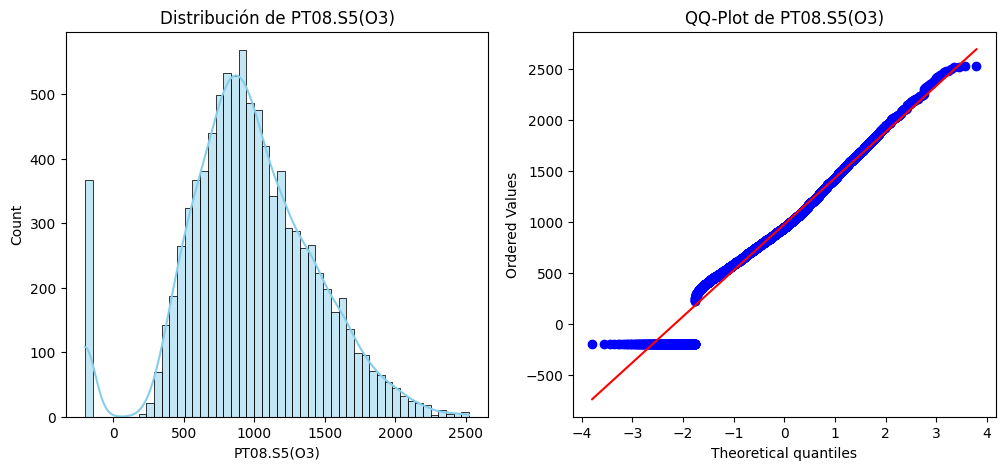


Pruebas de normalidad para la columna: PT08.S5(O3)
Shapiro-Wilk Test: p-valor = 0.00000
Kolmogorov-Smirnov Test: p-valor = 0.00000
Anderson-Darling Test: Estadístico = 45.68234
  Al nivel de significancia 15.0%, los datos NO parecen normales.
  Al nivel de significancia 10.0%, los datos NO parecen normales.
  Al nivel de significancia 5.0%, los datos NO parecen normales.
  Al nivel de significancia 2.5%, los datos NO parecen normales.
  Al nivel de significancia 1.0%, los datos NO parecen normales.
D'Agostino-Pearson Test: p-valor = 0.00000


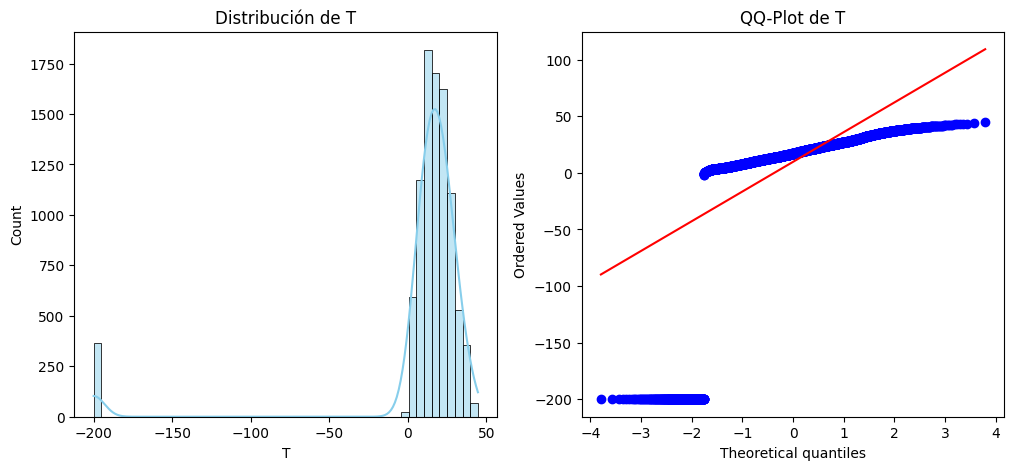


Pruebas de normalidad para la columna: T
Shapiro-Wilk Test: p-valor = 0.00000
Kolmogorov-Smirnov Test: p-valor = 0.00000
Anderson-Darling Test: Estadístico = 2041.45858
  Al nivel de significancia 15.0%, los datos NO parecen normales.
  Al nivel de significancia 10.0%, los datos NO parecen normales.
  Al nivel de significancia 5.0%, los datos NO parecen normales.
  Al nivel de significancia 2.5%, los datos NO parecen normales.
  Al nivel de significancia 1.0%, los datos NO parecen normales.
D'Agostino-Pearson Test: p-valor = 0.00000


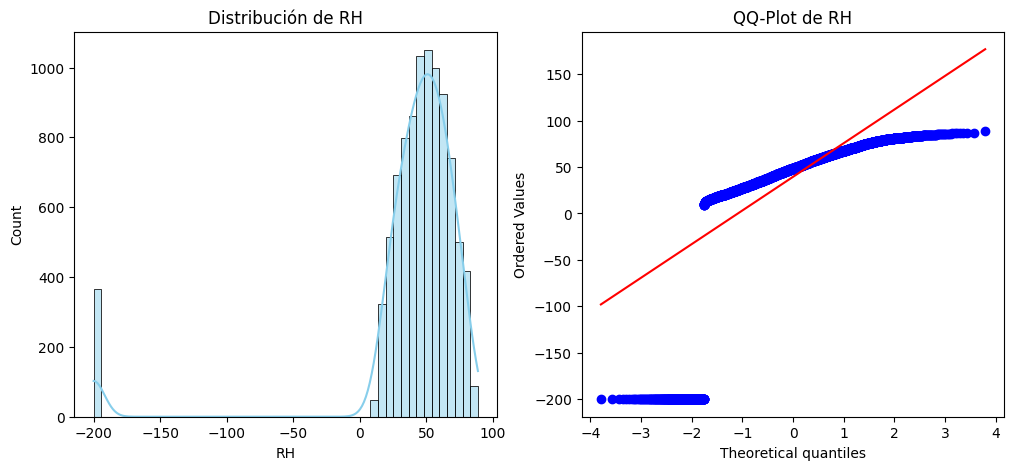


Pruebas de normalidad para la columna: RH
Shapiro-Wilk Test: p-valor = 0.00000
Kolmogorov-Smirnov Test: p-valor = 0.00000
Anderson-Darling Test: Estadístico = 1329.04460
  Al nivel de significancia 15.0%, los datos NO parecen normales.
  Al nivel de significancia 10.0%, los datos NO parecen normales.
  Al nivel de significancia 5.0%, los datos NO parecen normales.
  Al nivel de significancia 2.5%, los datos NO parecen normales.
  Al nivel de significancia 1.0%, los datos NO parecen normales.
D'Agostino-Pearson Test: p-valor = 0.00000


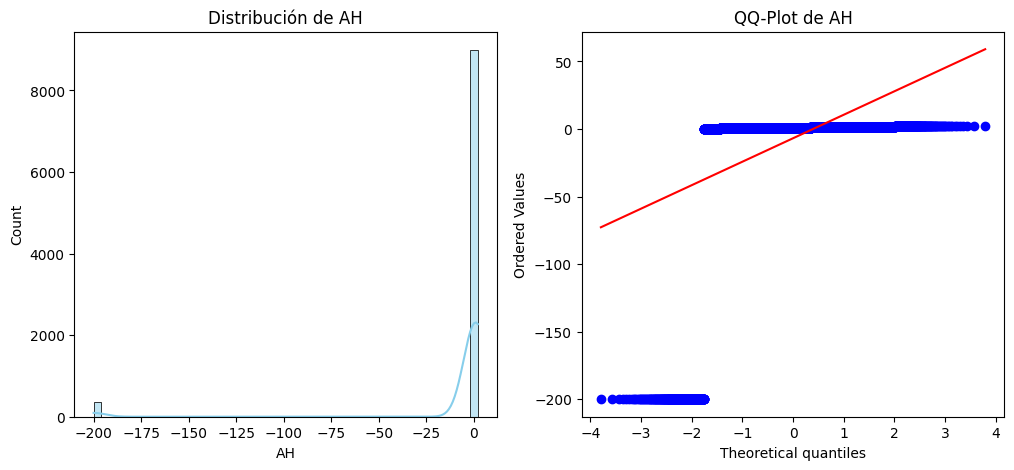


Pruebas de normalidad para la columna: AH
Shapiro-Wilk Test: p-valor = 0.00000
Kolmogorov-Smirnov Test: p-valor = 0.00000
Anderson-Darling Test: Estadístico = 3357.68062
  Al nivel de significancia 15.0%, los datos NO parecen normales.
  Al nivel de significancia 10.0%, los datos NO parecen normales.
  Al nivel de significancia 5.0%, los datos NO parecen normales.
  Al nivel de significancia 2.5%, los datos NO parecen normales.
  Al nivel de significancia 1.0%, los datos NO parecen normales.
D'Agostino-Pearson Test: p-valor = 0.00000


In [20]:
# Aplicar pruebas de normalidad y gráficos a cada columna numérica
for column in columns:
    data = df_num[column]
    plot_distribution(data, column)
    normality_tests(data, column)

Solo se aplican las pruebas de normalidad, ya que estas si se ven afectadas en presencia de valores nulos, en este caso se observa que no siguen una distribución normal, sin emabrgo, el valor p-value ya no devuelve un valor nulo

## 1.- Análisis Exploratorio de Datos (EDA):

¿Qué patrones o tendencias observaste en los histogramas y gráficas de densidad (PDF)? ¿Alguna variable parece seguir una distribución normal? \
Visualmente, en la mayoría de los histogramas se observa un segmento dónde parece distribuirse como una normal, sin embargo, existen otras acumulaciones que se separan del resto, pareciendo formar otro pico, por lo que ya no siguen una distribución normal. Solo en 3 variables [CO(GT), NMHC(GT) y AH], se observa que los valores se concentran en dos extremos, pero en los valores intermedios de dichos extremos, no se observan acumulaciones.

¿Qué información útil obtuviste de las gráficas de barras para las variables categóricas (por ejemplo, DayOfWeek)? \
Para esta gráfica en particular, se observa que los valores están balanceados, es decir, se tiene casi la misma cantidad de observaciones por cada categoría

¿Identificaste outliers en los boxplots? ¿Cómo podrían afectar estos outliers al modelo de regresión lineal? \
Si, en todas las variables numéricas se observan valores atípicos, en unas mas que en otras, pero en general pueden generar mucho sesgo en el ajuste de modelos de regresión lineal, ya que todos esos valores se separan mucho del resto, haciendo difícil encontrar una función que se ajuste a estas observaciones, aumentando considerablemente el error del modelo.

## 2.- Pruebas de Normalidad

¿Qué conclusiones obtuviste de las pruebas de normalidad (Shapiro-Wilk, Anderson-Darling, Kolmogorov-Smirnov)? ¿Qué variables no siguen una distribución normal? \
Ninguna de las variables sigue una distribución normal, en ninguna de las pruebas se obtuvo que se cumpla la hipotésis de normalidad.

¿Cómo interpretas los QQplots? ¿Qué variables se desvían significativamente de la normalidad? \
Los QQplots hacen una comparación con respecto a los cuantiles y simulan como se vería la distribución de una normal comparados con la distribución real de nuestros datos, en ningún caso se ajusta de manera adecuada, en algunas variables mas que en otras pero igual no se cumplen las pruebas, en el caso de las variables CO(GT), NMHC(GT) y AH son las que menos se asemejan.

## Tratamiento de Datos Faltantes

¿Qué estrategia utilizaste para manejar los datos faltantes? ¿Por qué elegiste esa estrategia? \
Se decidió eliminar los valores nulos, esto dado que en el caso de las columnas y registros se observaba que todos los valores eran nulos, es decir, a nivel registro, aquellos que tenían valor nulo en una variable también eran nulos en todas las demás, por lo que no valía la pena imputar, ya que todos esos registros serían 100% sintéticos y además iguales entre sí, ya que se imputaría el mismo valor en todos, lo mismo en la columnas, aquellas con valores nulos se repetían para todos los registros, es decir, no había ni un solo valor de referencia.

¿Cómo cambió el EDA después de la imputación de datos? ¿Observaste diferencias significativas en las distribuciones de las variables? \
Dado que las librerías omiten los valores nulos por default al graficar, el resultado sería exactamente el mismo, ya que solo se eliminaron, en caso de haber imputado sería posible observar cambios en las distribuciones, pero este no es el caso.

## 4.- Matriz de Correlación y Pairplot

¿Qué relaciones lineales identificaste en la matriz de correlación y el pairplot? ¿Alguna variable tiene una correlación fuerte con la variable objetivo? \
Se observan relaciones directamente proporcionales entre todas las variables tipo PT08, excepto con PT08.S3(CO), ya que en ese caso la relación es inversa con respecto al resto, esto de manera visual, pero con los coeficientes de la matriz se observan relaciones directamente proporcionales entre las variables PT08.S1(CO), C6H6(GT), PT08.S2(NMHC), PT08.S4(NO2), PT08.S5(O3), T, RH, AH

¿Cómo podrías utilizar esta información para seleccionar características (features) en un modelo de regresión lineal? \
Dado que existen correlaciones altas entre ciertas variables, se podría seleccionar solo alguna de ellas, ya que el resto no aportan información nueva significativa al modelo.